## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
loan_credit=pd.read_csv(r"C:\Users\Anish Gupta\Desktop\XYZCorp_LendingData.txt",sep='\t',na_values='NaN',parse_dates=['issue_d'],low_memory=False)


In [3]:
loan_credit.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
loan_credit[['issue_d']].head()

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


### Dividing Dataset in Train And Test..

In [ ]:
train_df = loan_credit[loan_credit['issue_d'] < '2015-6-01']
test_df = loan_credit[loan_credit['issue_d'] >= '2015-6-01']

Shape of Train and Test dataset

In [6]:
train_df.shape

(598978, 73)

In [7]:
test_df.shape

(256991, 73)

In [8]:
#Deleting some columns..
Range_columns = [i for i in range(59,70)]
train_data_1 = train_df.drop(train_df.columns[Range_columns],axis = 1)
test_data_1 = test_df.drop(test_df.columns[Range_columns],axis =1)

In [9]:
train_data_1.shape

(598978, 62)

In [10]:
test_data_1.shape

(256991, 62)

In [11]:
del_columns = ['total_cu_tl','inq_last_12m','annual_inc_joint','dti_joint',
               'verification_status_joint']
Train_data_1 = train_data_1.drop(labels = del_columns,axis = 1)
Test_data_1 = test_data_1.drop(labels = del_columns,axis = 1)

In [12]:
drop_more_col = ['open_il_6m']
Train_data_2 = Train_data_1.drop(labels = drop_more_col,axis = 1)
Test_data_2 = Test_data_1.drop(labels = drop_more_col,axis = 1)

In [13]:
print("the shape of train data;",Train_data_2.shape)
print("the shape of test data;",Test_data_2.shape)

the shape of train data; (598978, 56)
the shape of test data; (256991, 56)


In [14]:
train_target = pd.DataFrame(Train_data_1['default_ind'])
test_target = pd.DataFrame(Test_data_1['default_ind'])

In [15]:
Train_data_3 = Train_data_2.iloc[:,0:56]
Test_data_3 = Test_data_2.iloc[:,0:56]

In [16]:
Test_data_3.shape

(256991, 56)

In [17]:
Train_data_3.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,default_ind
count,5.989780e+05,5.989780e+05,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,5.989780e+05,598978.000000,598978.000000,...,598978.000000,598978.000000,598922.000000,138227.000000,598978.0,598978.000000,5.316650e+05,5.316650e+05,0.0,598978.000000
mean,2.044157e+07,2.231985e+07,14540.642519,14521.789031,14478.973948,13.520911,434.562058,7.397280e+04,17.638408,0.297171,...,7.075547,2815.793083,0.011255,43.363084,1.0,0.004625,2.089273e+02,1.389905e+05,NaN,0.077058
std,1.619182e+07,1.711491e+07,8336.476483,8327.529212,8337.695086,4.370961,242.892709,5.676163e+04,8.070746,0.828659,...,74.587986,5398.379951,0.119935,21.860221,0.0,0.075951,1.268440e+04,1.525544e+05,NaN,0.266684
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000
25%,5.937838e+06,7.205072e+06,8000.000000,8000.000000,8000.000000,10.160000,259.642500,4.500000e+04,11.610000,0.000000,...,0.000000,305.080000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.919700e+04,NaN,0.000000
50%,1.564996e+07,1.763377e+07,12600.000000,12525.000000,12500.000000,13.330000,381.840000,6.300000e+04,17.210000,0.000000,...,0.000000,507.380000,0.000000,43.000000,1.0,0.000000,0.000000e+00,8.098600e+04,NaN,0.000000
75%,3.671239e+07,3.943412e+07,20000.000000,20000.000000,20000.000000,16.290000,568.900000,9.000000e+04,23.290000,0.000000,...,0.000000,1506.602500,0.000000,60.000000,1.0,0.000000,0.000000e+00,2.084020e+05,NaN,0.000000
max,5.095230e+07,5.433202e+07,35000.000000,35000.000000,35000.000000,28.990000,1409.990000,8.706582e+06,39.990000,39.000000,...,7002.190000,36475.590000,20.000000,188.000000,1.0,14.000000,9.152545e+06,8.000078e+06,NaN,1.000000


### Extracting all the numerical columns which have missing values...

In [20]:
#mean of all the numerical columns....
mean_train = Train_data_3[['mths_since_last_delinq','mths_since_last_record','revol_util'
                     ,'collections_12_mths_ex_med','mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].mean()
mean_test = Test_data_3[['mths_since_last_delinq','mths_since_last_record','revol_util'
                     ,'collections_12_mths_ex_med','mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].mean()

In [22]:
Train_data_3[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']] = Train_data_3[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].fillna(mean_train)
Test_data_3[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']] = Test_data_3[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].fillna(mean_test)

### Extracting all the string columns(object)..

In [23]:
pd.unique(Train_data_3[['term','grade','home_ownership']].values.ravel('K'))
pd.unique(Test_data_3[['term','grade','home_ownership']].values.ravel('K'))

array([' 36 months', ' 60 months', 'A', 'E', 'D', 'C', 'B', 'F', 'G',
       'MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [24]:
Train_data_3['grade'] = Train_data_3['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Train_data_3['home_ownership'] = Train_data_3['home_ownership'].map({'MORTGAGE':6,'RENT':5,'OWN':4,'OTHER':3
                                                                 ,'NONE':2,'ANY':1})

Train_data_3["emp_length"] = Train_data_3["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0','s':''},
                                                            regex = True)

##test
Test_data_3['grade'] = Test_data_3['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Test_data_3['home_ownership'] = Test_data_3['home_ownership'].map({'MORTGAGE':6,'RENT':5,'OWN':4,'OTHER':3
                                                                 ,'NONE':2,'ANY':1})

Test_data_3["emp_length"] = Test_data_3["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0','s':''},
                                                            regex = True)

In [25]:
Train_data_3['term'] = Train_data_3['term'].replace({'months':'',' ':''},regex = True)
Test_data_3['term'] = Test_data_3['term'].replace({'months':'',' ':''},regex = True)

In [26]:
print(Train_data_3['emp_length'].value_counts(dropna = False))

10     195407
1       84405
2       53373
3       47128
5       38429
4       35792
7       32676
6       31338
8       29126
NaN     28105
9       23199
Name: emp_length, dtype: int64


In [27]:
Train_data_3['emp_length']= pd.to_numeric(Train_data_3['emp_length'],errors = 'coerce')
Test_data_3['emp_length']= pd.to_numeric(Test_data_3['emp_length'],errors = 'coerce')

In [28]:
mean = Train_data_3['emp_length'].mean()
mean_test = Test_data_3['emp_length'].mean()
Train_data_3['emp_length'] = Train_data_3['emp_length'].fillna(mean)
Test_data_3['emp_length'] = Test_data_3['emp_length'].fillna(mean_test)

In [29]:
Train_data_3['term']= pd.to_numeric(Train_data_3['term'],errors = 'coerce')
Test_data_3['term']= pd.to_numeric(Test_data_3['term'],errors = 'coerce')

## Features Selection.

In [30]:
features = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','emp_length','home_ownership',
'annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med',
'mths_since_last_major_derog','policy_code','acc_now_delinq','tot_coll_amt','tot_cur_bal']
train = Train_data_3[features]
test = Test_data_3[features]

In [31]:
test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal
452272,25000.0,25000.0,25000.0,36,5.32,752.87,7,1.0,6,150000.0,...,0.0,0.0,0.0,701.14,0.0,45.463878,1.0,0.0,0.0,430856.0
452273,18000.0,18000.0,18000.0,60,19.48,471.70,3,7.0,5,150000.0,...,0.0,0.0,0.0,335.34,0.0,45.463878,1.0,0.0,60.0,36247.0
452274,7000.0,7000.0,7000.0,36,7.49,217.72,7,10.0,6,59000.0,...,0.0,0.0,0.0,0.00,0.0,45.463878,1.0,0.0,0.0,55222.0
452275,20000.0,20000.0,20000.0,36,17.97,722.75,4,7.0,6,180000.0,...,0.0,0.0,0.0,0.00,0.0,45.463878,1.0,0.0,418.0,277227.0
452276,15000.0,15000.0,15000.0,36,6.99,463.09,7,2.0,6,93000.0,...,0.0,0.0,0.0,0.00,0.0,45.463878,1.0,0.0,0.0,306430.0


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [33]:
select.fit(train,train_target)

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold='median')

In [34]:
X_train_s = select.transform(train)

In [35]:
print('The shape of train is: ', train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

The shape of train is:  (598978, 36)
The shape of X_train_s is  (598978, 18)


In [36]:
X_train_s =pd.DataFrame(X_train_s)

In [37]:
X_train_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,208.927341,138990.46045
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,208.927341,138990.46045
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,208.927341,138990.46045
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,208.927341,138990.46045
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,208.927341,138990.46045


In [38]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,5000.0,4975.0,36,10.65,162.87,6,10.0,5,24000.0,...,0.00,0.00,0.00,171.62,0.0,43.363084,1.0,0.0,208.927341,138990.46045
1,2500.0,2500.0,2500.0,60,15.27,59.83,5,1.0,5,30000.0,...,0.00,117.08,1.11,119.66,0.0,43.363084,1.0,0.0,208.927341,138990.46045
2,2400.0,2400.0,2400.0,36,15.96,84.33,5,10.0,5,12252.0,...,0.00,0.00,0.00,649.91,0.0,43.363084,1.0,0.0,208.927341,138990.46045
3,10000.0,10000.0,10000.0,36,13.49,339.31,5,10.0,5,49200.0,...,16.97,0.00,0.00,357.48,0.0,43.363084,1.0,0.0,208.927341,138990.46045
4,3000.0,3000.0,3000.0,60,12.69,67.79,6,1.0,5,80000.0,...,0.00,0.00,0.00,67.79,0.0,43.363084,1.0,0.0,208.927341,138990.46045


[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True False False False False  True  True]


Text(0.5, 0, 'Index of Features')

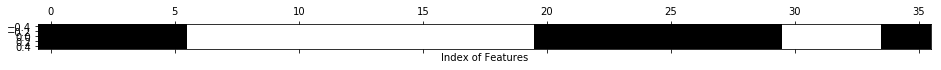

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [40]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(train,train_target)

for n,s in zip(train,Selector_f.scores_):
    print('F-score:', (s,n))

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: (0.7075164845998739, 'loan_amnt')
F-score: (0.02230666814250503, 'funded_amnt')
F-score: (3.4926499501584085, 'funded_amnt_inv')
F-score: (1265.6822527519407, 'term')
F-score: (16797.447611993008, 'int_rate')
F-score: (36.04571536374752, 'installment')
F-score: (12795.86624341213, 'grade')
F-score: (157.23718862440958, 'emp_length')
F-score: (430.0996906296113, 'home_ownership')
F-score: (1229.7197792382153, 'annual_inc')
F-score: (482.33321921530927, 'dti')
F-score: (27.337977244390597, 'delinq_2yrs')
F-score: (3142.4549039440176, 'inq_last_6mths')
F-score: (1.3131988097131733, 'mths_since_last_delinq')
F-score: (211.9363433464852, 'mths_since_last_record')
F-score: (169.5338452367516, 'open_acc')
F-score: (166.40483552829113, 'pub_rec')
F-score: (261.89900248329286, 'revol_bal')
F-score: (1187.9875758248374, 'revol_util')
F-score: (368.170635919046, 'total_acc')
F-score: (31386.8718909261, 'out_prncp')
F-score: (31383.144503813404, 'out_prncp_inv')
F-score: (10503.6769162766

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [32] are constant.
  UserWarning)
C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Forward stepwise process for variable selection.

In [50]:
from sklearn.linear_model import LogisticRegression
def auc(variables,target,Train_data_3):
    X = Train_data_3[variables]
    y = Train_data_3[target]
    logreg = LogisticRegression()
    logreg.fit(X,y)
    predictions = logreg.predict_proba(X)[:,1]
    auc =  roc_auc_score(y,predictions)
    return auc



In [65]:
from sklearn.metrics import roc_auc_score
auc = auc(['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
 'last_pymnt_amnt','tot_coll_amt','tot_cur_bal']
          ,['default_ind'],Train_data_3)

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print(round(auc,2))

0.99


## Logistic Regression.

In [52]:
features = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','out_prncp',
            'out_prncp_inv','total_pymnt',
 'total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
 'last_pymnt_amnt','tot_cur_bal']

In [53]:
Final_train = Train_data_3[features]
Final_test = Test_data_3[features]

In [54]:
train_target.shape

(598978, 1)

In [55]:
Final_train.shape

(598978, 18)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Final_train,train_target,random_state = 42,test_size = 0.3)

In [58]:
logreg = LogisticRegression()

In [59]:
logreg.fit(X_train,y_train)

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = logreg.predict(X_test)

In [61]:
logreg.score(X_test,y_test)

0.9969114160739925

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
print("confusion matrix is: {}".format(confusion_matrix(y_test,y_pred)))

confusion matrix is: [[165789     16]
 [   539  13350]]


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165805
           1       1.00      0.96      0.98     13889

   micro avg       1.00      1.00      1.00    179694
   macro avg       1.00      0.98      0.99    179694
weighted avg       1.00      1.00      1.00    179694



In [67]:
#plotting the roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

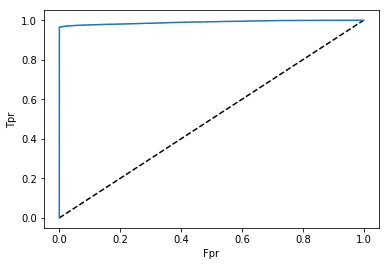

In [68]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')

In [69]:
roc_auc_score(y_test,y_pred_prob)

0.9900578324880953

### Predicting on the final_test values.

In [70]:
logreg.predict(Final_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [71]:
Predict_finaltest = logreg.predict_proba(Final_test)[:,1]
print("The probability of the coming 1 on the final_tes is :{}".format(Predict_finaltest,2))

The probability of the coming 1 on the final_tes is :[3.01814633e-07 6.05974177e-04 5.44399945e-02 ... 1.45858360e-07
 1.82300251e-06 1.41090767e-05]


In [72]:
roc_auc_score(test_target,Predict_finaltest)

0.902198278086694

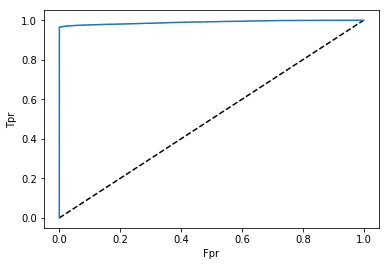

In [73]:
Predict_finaltest = logreg.predict_proba(Final_test)[:,1]
roc_curve(test_target,Predict_finaltest)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')

In [74]:
#cross validation
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logreg,Final_train,train_target,cv = 7)

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anish Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anish Gupta\Anaconda3\lib

In [75]:
print("the cv score is:{}".format(cv))

the cv score is:[0.99609672 0.99860931 0.99906508 0.99652912 0.99590969 0.99680952
 0.99449554]


#### collecting the next best variable.... def next_best(current_variables,candidate_variables,target,df): best_auc = -1 best_variable = None for v in candidate_variables: auc_v = auc(current_variables + [v],target,df) if auc_v > best_auc: best_auc = auc_v best_variable = v return best_variable

## KNN Classification.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(Final_train,train_target,random_state = 42,test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

C:\Users\Anish Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9950693957505538

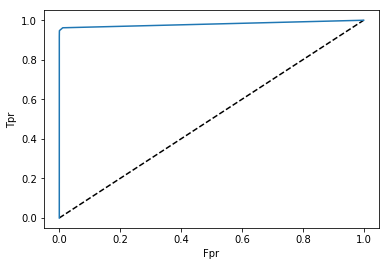

In [77]:
knn_predict = knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,knn_predict)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'knn')

## Predicting on the final test set uning knn.

In [78]:
y_pred = knn.predict(Final_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
pred = knn.predict_proba(Final_test)[:,1]

In [80]:
roc_auc_score(test_target,pred)

0.9124111020415526